In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url='/content/petrol_consumption.csv'
df = pd.read_csv(url)
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
df.isna().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [4]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [5]:
df.skew()

Petrol_tax                      0.078447
Average_income                  0.104102
Paved_Highways                  1.202688
Population_Driver_licence(%)    0.651048
Petrol_Consumption              1.085372
dtype: float64

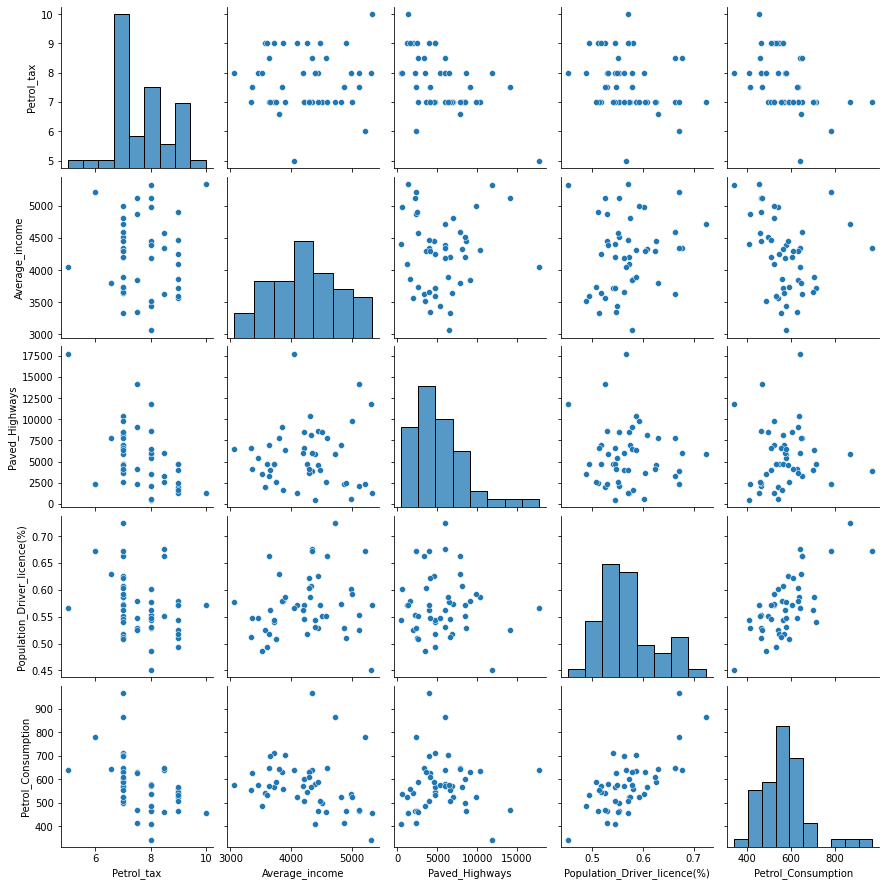

In [6]:
sns.pairplot(df)
plt.show()

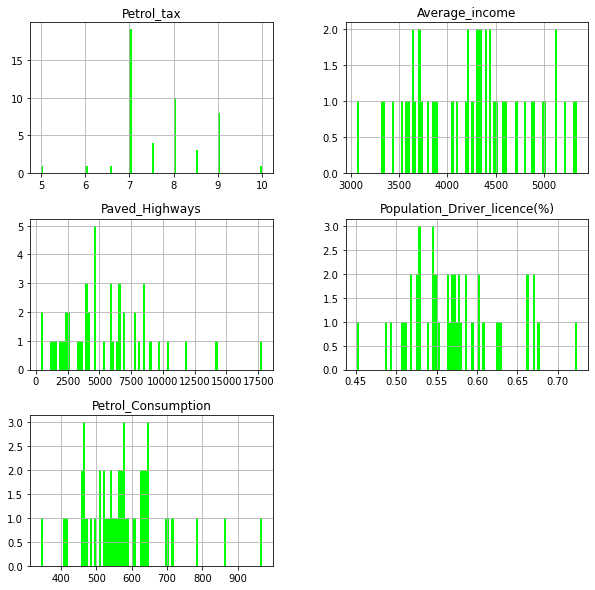

In [7]:
df.hist(bins=100,figsize=(10,10),color='lime')
plt.show()

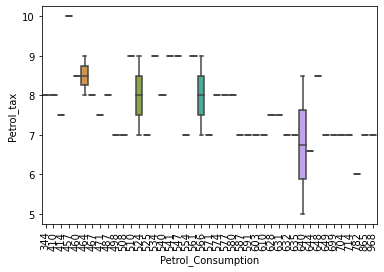

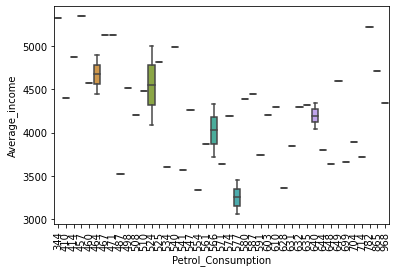

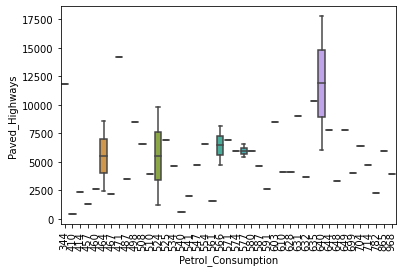

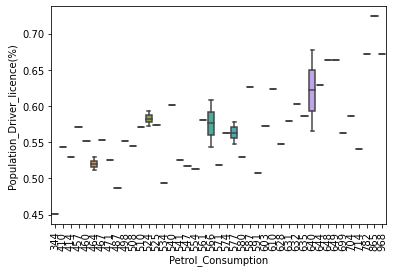

In [8]:
feature_names = df.columns.to_list()
feature_names.remove(df.columns.to_list()[-1])
for cols in feature_names :
  sns.boxplot(x=df[df.columns.to_list()[-1]],y=df[cols])
  plt.xticks(rotation=90)
  plt.xlabel(df.columns.to_list()[-1])
  plt.ylabel(cols)
  plt.show()

In [9]:
 X = df.drop(columns=df.columns.to_list()[-1]).values
 y = df[df.columns.to_list()[-1]]

In [10]:
scale = MinMaxScaler()
scaled=scale.fit_transform(X)
data = pd.DataFrame(data=scaled)
data.head()

,0,1,2,3
0,0.8,0.222905,0.089044,0.271062
1,0.8,0.451514,0.047202,0.443223
2,0.8,0.351909,0.066567,0.472527
3,0.5,0.792892,0.110656,0.285714
4,0.6,0.586222,0.000000,0.340659


In [11]:
def split_test_train(x,y,train_size =0.80,seed=None):
  np.random.seed(seed)
  y=np.array(y)
  data=np.concatenate([x,y.reshape(-1,1)],axis=1)
  np.random.shuffle(data)
  xtrain=data[:int(len(data)*train_size),:-1]
  ytrain=data[:int(len(data)*train_size),-1]
  xtest=data[int(len(data)*train_size):,:-1]
  ytest=data[int(len(data)*train_size):,-1]
  return xtrain,ytrain,xtest,ytest

In [12]:
xtrain,ytrain,xtest,ytest = split_test_train(data,y,train_size=0.80,seed=5)
print('Train data shapes \nx =',xtrain.shape,'y= ',ytrain.shape,'\nTest data shapes\nx =',xtest.shape,'y =',ytest.shape)

Train data shapes 
x = (38, 4) y=  (38,) 
Test data shapes
x = (10, 4) y = (10,)


In [13]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
y_pred=rfr.predict(xtest)

In [15]:
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
results_df = pd.DataFrame(data=[["Random Forest Regression", mae, mse, rmse, r2]],columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Random Forest Regression,58.115,8520.60525,92.307125,0.49192
